In [2]:
%matplotlib inline
import pandas as pd
pd.set_option("max_rows", 10)

<h1 style="text-align:center"> Pandas and the Python Data Stack </h1>

![](python_ecosystem.png)

# History Lesson

* Numeric (1995)
* SciPy (2001-2005)
* numarray (2005)
* NumPy (2006)
* Pandas (2009)
* Scikit-Learn (2010)

# Python Data Stack: NumPy

* ND-array data structure
* fast, core mathematical calculations
* FFTs
* polynomials
* some random number generators
* linear algebra
* f2py (Fortran code wrapper)
* numpy.testing


# Python Data Stack: SciPy

* Clustering
* More FFTs
* Numerical integration
* Interpolation
* I/O (csv, matlab, sparse matrix formats, etc.)
* Linear algebra
* Image processing
* Optimization (unconstrained quasi-newton, some constrained, some heuristics)
* Signal processing
* Sparse matrices and utilities for working with them
* Spatial data structures and algorithms
* Special functions (Bessel functions, Gamma function, hypergeometric, etc.)
* Stats (distributions, tests, etc.

# Python Data Stack: SciPy

<ul id="double"></li>
<li> Clustering</li>
<li> More FFTs</li>
<li> Numerical integration</li>
<li> Interpolation</li>
<li> I/O (csv, matlab, sparse matrix formats, etc.)</li>
<li> Linear algebra</li>
<li> Image processing</li>
<li> Optimization (unconstrained quasi-newton, some constrained, some heuristics)</li>
<li> Signal processing</li>
<li> Sparse matrices and utilities for working with them</li>
<li> Spatial data structures and algorithms</li>
<li> Special functions (Bessel functions, Gamma function, hypergeometric, etc.)</li>
<li> Stats (distributions, tests, etc.)</li>
</ul>


# Python Data Stack: Matplotlib

* base plotting library for Python
  * seaborn
  * ggplot
  * mpld3
* bokeh
  
![](tufte.svg)

# Python: Scikit-Learn

* Best in class machine learning package for Python
  * Well engineered and reviewed
  * Consistent, expressive, and powerul API
* Supervised learning
  * Classification
  * Regression
* Unsupervised learning
  * Clustering
  * Dimensionality Reduction
* Model selection
* Data preprocessing

# Why Python?

* Diversity of perspective
  * Web programmers
  * Computational scientists
    * Physical scientists (Engineers, Physicists)
    * Statisticians and Computer Scientists
* Community
  * People are nice! And helpful!
* Software Engineering Practices
  * Testing
  * Readable code (PEP-8)
* Design
  * Understandable
  * Clear, well thought out and transparent language choices
* Fully featured language (batteries included)
* Glue language

# Zen of Python

In [3]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# NumPy

* Good as a container for homogeneously typed data
* Good for doing linear algebra, computations, etc.
* N-dimensional

# Pandas: Overview

* Data structures
  * 2D DataFrames
  * 1D Series
* Arbitrary labelled indices
  * Multidimensional indices
* Support for heterogeneous data types
* Facilities for data wrangling
* I/O (csv, stata, hdf5, html, json, sql, etc.)
* Works with time series
* Plotting conveniences
* Statistical operations

# Pandas: DataFrames

In [4]:
weather = pd.read_csv("../data/weather_nyc.csv", 
                      parse_dates=[[0, 1, 2]],
                      na_values=[-99])
weather = weather.rename(columns={"month_day_year": "date"})
weather.set_index('date', inplace=True)
weather.head()

,temp,season,tempc
date,,,
1995-01-01,44.0,Winter,6.666667
1995-01-02,41.8,Winter,5.444444
1995-01-03,28.1,Winter,-2.166667
1995-01-04,31.7,Winter,-0.166667
1995-01-05,21.3,Winter,-5.944444


# Pandas: Labeled Indices

* Named, labeled indices
* Enhances Python + NumPy indexing further

In [5]:
weather['1995-Jan':'1995-Feb']

,temp,season,tempc
date,,,
1995-01-01,44.0,Winter,6.666667
1995-01-02,41.8,Winter,5.444444
1995-01-03,28.1,Winter,-2.166667
1995-01-04,31.7,Winter,-0.166667
1995-01-05,21.3,Winter,-5.944444
...,...,...,...
1995-02-24,43.3,Winter,6.277778
1995-02-25,31.2,Winter,-0.444444
1995-02-26,28.4,Winter,-2.000000


# Pandas: Time-Series

In [6]:
weather['1995-Jan':'1995-Feb'].resample("M", "mean")

,temp,tempc
date,,
1995-01-31,37.829032,3.238351
1995-02-28,31.985714,-0.007937


# Pandas: GroupBy

* Split-Apply-Combine

In [7]:
weather.groupby('season').mean()

,temp,tempc
season,,
Fall,52.622870,11.410867
Spring,58.353971,14.277229
Summer,75.810621,24.128110
Winter,36.158209,2.030979


# Pandas: Plotting

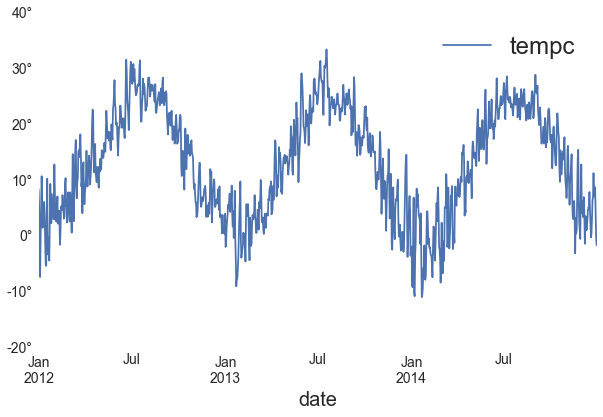

In [8]:
# pandas plotting
ax = weather['2012':'2014'].tempc.plot(legend=True, figsize=(10, 6), 
                                       fontsize=14)

# matplotlib formatting
ax.legend(fontsize=24)
ax.xaxis.get_label().set_fontsize(20)
yticks = range(-20, 41, 10)
yticks = [str(i) + u"\u00b0" for i in yticks]
ax.yaxis.set_ticklabels(yticks);

# Merging

* Facilities for SQL-like merges and joins

In [9]:
vessels = pd.read_csv("../data/AIS/vessel_information.csv", 
                      usecols=["mmsi", "type"])
vessels.head()

,mmsi,type
0,1,Dredging/MilOps/Reserved/Towing
1,9,Pleasure/Tug
2,21,Unknown
3,74,Unknown
4,103,Tanker/Unknown


In [10]:
transit = pd.read_csv("../data/AIS/transit_segments.csv", 
                      usecols=["mmsi", "name", "seg_length", 
                               "st_time", "end_time"],
                      parse_dates=False)
transit.head()

,mmsi,name,seg_length,st_time,end_time
0,1,Us Govt Ves,5.1,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,13.5,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,4.3,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,9.2,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,9.2,4/10/09 17:59,4/10/09 18:35


In [11]:
transit.merge(vessels, how="inner")

,mmsi,name,seg_length,st_time,end_time,type
0,1,Us Govt Ves,5.1,2/10/09 16:03,2/10/09 16:27,Dredging/MilOps/Reserved/Towing
1,1,Dredge Capt Frank,13.5,4/6/09 14:31,4/6/09 15:20,Dredging/MilOps/Reserved/Towing
2,1,Us Gov Vessel,4.3,4/6/09 14:36,4/6/09 14:55,Dredging/MilOps/Reserved/Towing
3,1,Us Gov Vessel,9.2,4/10/09 17:58,4/10/09 18:34,Dredging/MilOps/Reserved/Towing
4,1,Dredge Capt Frank,9.2,4/10/09 17:59,4/10/09 18:35,Dredging/MilOps/Reserved/Towing
...,...,...,...,...,...,...
262348,999999999,Triple Attraction,5.3,6/15/10 12:49,6/15/10 13:05,Pleasure
262349,999999999,Triple Attraction,18.7,6/15/10 21:32,6/15/10 22:29,Pleasure
262350,999999999,Triple Attraction,17.4,6/17/10 19:16,6/17/10 20:17,Pleasure
262351,999999999,Triple Attraction,31.5,6/18/10 2:52,6/18/10 5:03,Pleasure


# Pandas: Working with Text Data

In [12]:
vessels.type.head()

0    Dredging/MilOps/Reserved/Towing
1                       Pleasure/Tug
2                            Unknown
3                            Unknown
4                     Tanker/Unknown
Name: type, dtype: object

In [13]:
vessels.type.str.replace("/.+", "")

0        Dredging
1        Pleasure
2         Unknown
3         Unknown
4          Tanker
           ...   
10766    Pleasure
10767      BigTow
10768      Towing
10769     Fishing
10770    Pleasure
Name: type, dtype: object

# Pandas: Work with SQL

In [14]:
import sqlite3
con = sqlite3.connect("../data/fec.db")

query = """
SELECT sum(contb_receipt_amt) amount, contbr_st state, cand_nm  candidate
FROM fec
where election_tp='G2012' and state is not null
GROUP BY state, cand_nm
"""

pd.read_sql_query(query, con, index_col=["state", "candidate"])

amount
state candidate                
33    Romney, Mitt      1302.00
46    Romney, Mitt       402.00
48    Romney, Mitt       400.00
49    Romney, Mitt       100.00
7     Romney, Mitt      1258.00
...                         ...
WY    Obama, Barack   343754.97
      Romney, Mitt   1270161.68
      Stein, Jill        500.00
XX    Romney, Mitt    240936.56
ZZ    Obama, Barack    11041.60

[417 rows x 1 columns]

# Pandas: Works with Excel

In [15]:
pd.read_excel("../data/microbiome/metadata.xls").head()

,BARCODE,GROUP,SAMPLE
0,MID1,EXTRACTION CONTROL,NaN
1,MID2,NEC 1,tissue
2,MID3,Control 1,tissue
3,MID4,NEC 2,tissue
4,MID5,Control 2,tissue


# Pandas: Recap

* Tool for working with tabular data that is
  * Flexible
  * Intuitive
  * Powerful
  * Performant